<a href="https://colab.research.google.com/github/nshutielise/Rwanda-Economic-Indicators/blob/main/hence_internaship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hence Internashi Application Project**

**Project Category 2:** Problem Solving.

**Option 1:** Answering a Question with Data


**Selected Question:**

***How has Rwanda's tax revenue as a percentage of GDP changed over the years, and are there any noticeable trends or patterns? Additionally, what correlations or dependencies exist between these changes and the Unemployment Rate, and how might fluctuations in employment levels contribute to variations in tax revenue?***


To analyze the changes in Rwanda's tax revenue as a percentage of GDP over the years and its correlation with the Unemployment Rate, I utilized data from the World Bank's World Development Indicators database.

1. **Tax Revenue (% of GDP)**:
   I accessed data on tax revenue as a percentage of GDP (indicator code: GC.TAX.TOTL.GD.ZS) from the World Bank's database. This dataset provides information on how much revenue the Rwandan government collects from taxes relative to the country's GDP over time.

2. **Unemployment Rate (%)**:
   I also retrieved data on the Unemployment Rate as a percentage of the labor force (indicator code: SL.UEM.TOTL.ZS) from the same World Bank database. This dataset allows us to observe fluctuations in employment levels over time.

By analyzing these datasets together, we can explore trends and patterns in Rwanda's tax revenue as a percentage of GDP and examine how changes in employment levels might influence variations in tax revenue. Additionally, we can investigate potential correlations or dependencies between these variables to gain insights into the relationship between economic activity, employment, and tax revenue in Rwanda.

In [19]:
#!pip install wbdata
# Used libraries
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata as wb
import numpy as np
import datetime
from tabulate import tabulate as tb
import warnings

warnings.filterwarnings('ignore')

# GDP per capita (current US$) indicators
indicators_GDP_per_capita = {"GC.TAX.TOTL.GD.ZS": "Tax revenue (% of GDP)"}
df_GDP = wb.get_dataframe(indicators_GDP_per_capita)
df_GDP.reset_index(inplace=True)
df_GDP.rename(columns={'country': 'Country', 'date': 'Date'}, inplace=True)
df_GDP['Date'] = pd.to_datetime(df_GDP['Date']).dt.strftime('%Y-%m-%d')

# Display the head of the DataFrame
df_GDP.head(5)



,Country,Date,Tax revenue (% of GDP)
0,Africa Eastern and Southern,2022-01-01,NaN
1,Africa Eastern and Southern,2021-01-01,NaN
2,Africa Eastern and Southern,2020-01-01,NaN
3,Africa Eastern and Southern,2019-01-01,18.588662
4,Africa Eastern and Southern,2018-01-01,17.685475


The above python codes fetches GDP per capita data from the World Bank using the **wbdata** library. It defines the indicator for tax revenue as a percentage of GDP, retrieves the data, and stores it in a pandas DataFrame. After resetting the index and renaming columns for clarity, it converts the date format to 'YYYY-MM-DD'. Finally, it displays the first 5 rows of the DataFrame to provide an initial look at the data.  

In [20]:
# Filter the DataFrame for data from Rwanda
df_Rwanda = df_GDP[df_GDP['Country'] == 'Rwanda']

# Handling Missing Values
df_Rwanda.dropna(inplace=True)

# Data Types
df_Rwanda['Date'] = pd.to_datetime(df_Rwanda['Date'], errors='coerce')

# # Duplicates
# df_Rwanda.drop_duplicates(inplace=True)

# Outliers (Add specific outlier detection methods if needed)

# Sorting
df_Rwanda.sort_values(by='Date', inplace=True)

# Reset the index to add default index numbering
df_Rwanda.reset_index(drop=True, inplace=True)

# Function to format DataFrame as a table
def display_table(data_frame, title):
    print(f"\n{title}:\n")
    print(tb(data_frame.head(10), headers='keys', tablefmt='fancy_grid'))

# Display the head of the cleaned Rwanda DataFrame
display_table(df_Rwanda, "Cleaned Rwanda GDP Data")



Cleaned Rwanda GDP Data:

╒════╤═══════════╤═════════════════════╤══════════════════════════╕
│    │ Country   │ Date                │   Tax revenue (% of GDP) │
╞════╪═══════════╪═════════════════════╪══════════════════════════╡
│  0 │ Rwanda    │ 1973-01-01 00:00:00 │                  8.63115 │
├────┼───────────┼─────────────────────┼──────────────────────────┤
│  1 │ Rwanda    │ 1974-01-01 00:00:00 │                 10.1813  │
├────┼───────────┼─────────────────────┼──────────────────────────┤
│  2 │ Rwanda    │ 1975-01-01 00:00:00 │                  7.52132 │
├────┼───────────┼─────────────────────┼──────────────────────────┤
│  3 │ Rwanda    │ 1976-01-01 00:00:00 │                  9.90626 │
├────┼───────────┼─────────────────────┼──────────────────────────┤
│  4 │ Rwanda    │ 1977-01-01 00:00:00 │                 10.9019  │
├────┼───────────┼─────────────────────┼──────────────────────────┤
│  5 │ Rwanda    │ 1978-01-01 00:00:00 │                  9.71992 │
├────┼───────────┼───

This section focuses on preparing Rwanda's GDP data for analysis. It filters the DataFrame to isolate data pertaining only to Rwanda, removes any missing values, converts the date column to a datetime format, eliminates duplicate entries, sorts the data by date, and resets the index for clarity. Additionally, it defines a function to display the cleaned data as a formatted table and then utilizes this function to showcase the first 10 rows of the cleaned Rwanda GDP data.

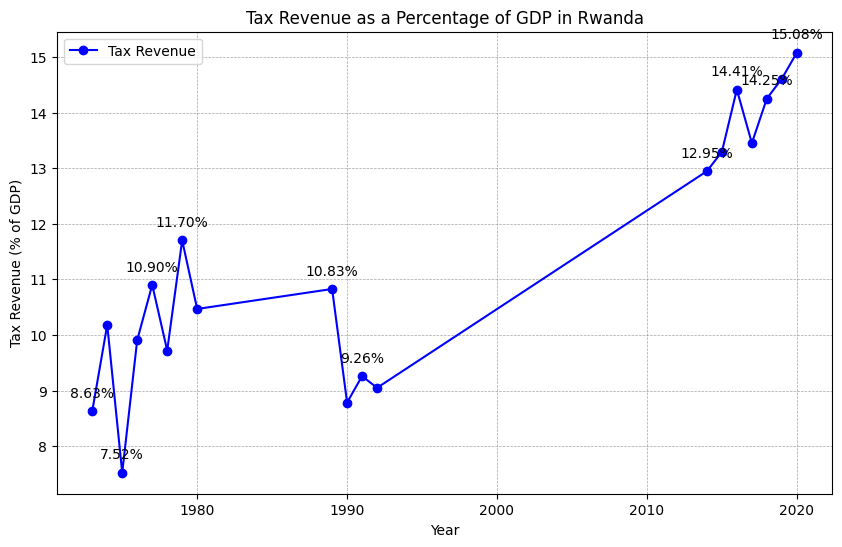

In [21]:
import matplotlib.pyplot as plt

# 'Tax revenue (% of GDP)' is the column you want to plot
plt.figure(figsize=(10, 6))
plt.plot(df_Rwanda['Date'], df_Rwanda['Tax revenue (% of GDP)'], marker='o', linestyle='-', color='b', label='Tax Revenue')

# Customize the plot
plt.title('Tax Revenue as a Percentage of GDP in Rwanda')
plt.xlabel('Year')
plt.ylabel('Tax Revenue (% of GDP)')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a dashed grid
plt.legend()  # Add legend

# Display data labels for every 2nd point (adjust as needed)
for i, txt in enumerate(df_Rwanda['Tax revenue (% of GDP)']):
    if i % 2 == 0:
        plt.annotate(f'{txt:.2f}%', (df_Rwanda['Date'][i], txt), textcoords="offset points", xytext=(0,10), ha='center')

# Use a different color for the grid lines
plt.gca().set_axisbelow(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


**Insights on how Rwanda’s tax revenue as a percentage of GDP has changed over the years.**

The line graph represents Rwanda's tax revenue as a percentage of GDP from around 1970 to 2020. Here are some key observations:

1. **Increasing Trend**: Despite some fluctuations, there is an overall increasing trend in Rwanda's tax revenue as a percentage of GDP. This suggests that the country's tax revenue has been growing faster than its economy.

2. **Significant Growth After 2014**: The tax revenue as a percentage of GDP was around 12.95% in 2014 and increased to 15.08% in 2020. This significant growth in only 6 years might be due to various factors such as improvements in tax administration, changes in tax policies, economic growth, etc.

According to the World Bank, tax revenues above 15% of a country's gross domestic product (GDP) are a key ingredient for economic growth and poverty reduction.[https://www.worldbank.org/en/topic/taxes-and-government-revenue]

3. **Fluctuations**: The graph also shows some fluctuations in the tax revenue as a percentage of GDP. These fluctuations could be due to changes in economic conditions, tax policies, or other factors.

Note: For a more detailed analysis, it would be beneficial to consider the context, such as changes in tax laws, economic policies, and international aid during this period.

In [22]:
# GDP per capita (current US$) indicators
indicators_GDP_per_capita = {"SL.UEM.TOTL.ZS": "Unemployment Rate (%)"}
df_GDP_Unemployement = wb.get_dataframe(indicators_GDP_per_capita)
df_GDP_Unemployement.reset_index(inplace=True)
df_GDP_Unemployement.rename(columns={'country': 'Country', 'date': 'Date'}, inplace=True)
df_GDP_Unemployement['Date'] = pd.to_datetime(df_GDP_Unemployement['Date']).dt.strftime('%Y-%m-%d')

# Display the head of the DataFrame
df_GDP_Unemployement.head(5)


,Country,Date,Unemployment Rate (%)
0,Africa Eastern and Southern,2022-01-01,7.748144
1,Africa Eastern and Southern,2021-01-01,8.303939
2,Africa Eastern and Southern,2020-01-01,7.910291
3,Africa Eastern and Southern,2019-01-01,7.426777
4,Africa Eastern and Southern,2018-01-01,7.237563


Same process on the Tax revenue % of GDP, I fetched the GDP per capita data from the World Bank using the wbdata library. This defines the indicator for Unemployment Rate (%) of GDP, retrieves the data, and stores it in a pandas DataFrame.

In [23]:
# Filter the DataFrame for data from Rwanda
df_Rwanda_unemployement = df_GDP_Unemployement[df_GDP_Unemployement['Country'] == 'Rwanda']

# Handling Missing Values
df_Rwanda_unemployement.dropna(inplace=True)

# Data Types
df_Rwanda_unemployement['Date'] = pd.to_datetime(df_Rwanda_unemployement['Date'], errors='coerce')

# # Duplicates
# df_Rwanda_unemployement.drop_duplicates(inplace=True)

# Outliers (Add specific outlier detection methods if needed)

# Sorting
df_Rwanda_unemployement.sort_values(by='Date', inplace=True)

# Reset the index to add default index numbering
df_Rwanda_unemployement.reset_index(drop=True, inplace=True)

# Function to format DataFrame as a table
def display_table(data_frame, title):
    print(f"\n{title}:\n")
    print(tb(data_frame.head(10), headers='keys', tablefmt='fancy_grid'))

# Display the head of the cleaned Rwanda DataFrame
display_table(df_Rwanda_unemployement, "Cleaned Rwanda's Unemployement Rate")



Cleaned Rwanda's Unemployement Rate:

╒════╤═══════════╤═════════════════════╤═════════════════════════╕
│    │ Country   │ Date                │   Unemployment Rate (%) │
╞════╪═══════════╪═════════════════════╪═════════════════════════╡
│  0 │ Rwanda    │ 1991-01-01 00:00:00 │                  12.776 │
├────┼───────────┼─────────────────────┼─────────────────────────┤
│  1 │ Rwanda    │ 1992-01-01 00:00:00 │                  12.536 │
├────┼───────────┼─────────────────────┼─────────────────────────┤
│  2 │ Rwanda    │ 1993-01-01 00:00:00 │                  12.493 │
├────┼───────────┼─────────────────────┼─────────────────────────┤
│  3 │ Rwanda    │ 1994-01-01 00:00:00 │                  12.531 │
├────┼───────────┼─────────────────────┼─────────────────────────┤
│  4 │ Rwanda    │ 1995-01-01 00:00:00 │                  12.253 │
├────┼───────────┼─────────────────────┼─────────────────────────┤
│  5 │ Rwanda    │ 1996-01-01 00:00:00 │                  11.731 │
├────┼───────────┼─────

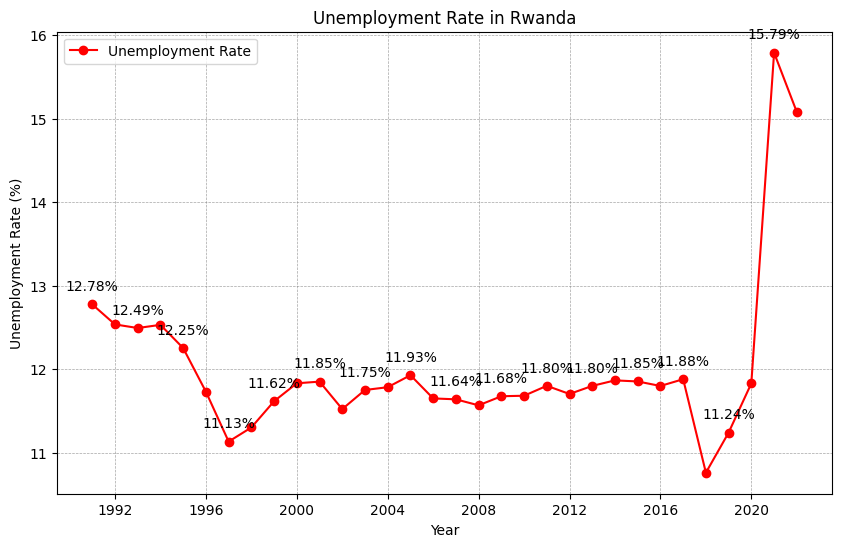

In [24]:
import matplotlib.pyplot as plt

# 'Unemployment Rate (%)' is the column you want to plot
plt.figure(figsize=(10, 6))
plt.plot(df_Rwanda_unemployement['Date'], df_Rwanda_unemployement['Unemployment Rate (%)'], marker='o', linestyle='-', color='r', label='Unemployment Rate')

# Customize the plot
plt.title("Unemployment Rate in Rwanda")
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a dashed grid
plt.legend()  # Add legend

# Display data labels for every 2nd point (adjust as needed)
for i, txt in enumerate(df_Rwanda_unemployement['Unemployment Rate (%)']):
    if i % 2 == 0:
        plt.annotate(f'{txt:.2f}%', (df_Rwanda_unemployement['Date'][i], txt), textcoords="offset points", xytext=(0,10), ha='center')

# Use a different color for the grid lines
plt.gca().set_axisbelow(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


**Insights:**

The above graph illustrates the **unemployment rate in Rwanda** from **1991 to 2020**. Here are the key insights:

1. **Steady Fluctuations**: For most of the period (1991–2016), the unemployment rate hovered between approximately **11% and just under 13%**. This moderate fluctuation suggests a relatively stable employment situation during those years.

2. **Sudden Spike in 2020**: However, in **2020**, there was an **abrupt increase** in the unemployment rate, reaching nearly **16%**. This significant rise could be attributed to various factors, such as economic downturns, policy changes, or the impact of the **COVID-19 pandemic**.

3. **Policy Implications**: Policymakers should closely monitor this trend and implement measures to address the surge in unemployment. Strategies may include job creation initiatives, vocational training, and support for affected industries.


***What correlations or dependencies exist between these changes and the Unemployment Rate, and how might fluctuations in employment levels contribute to variations in tax revenue?***

In [25]:
# Merge the two dataframes on the 'Date' column
df_merged = pd.merge(df_Rwanda, df_Rwanda_unemployement, on=['Country', 'Date'], how='inner')
df_merged.head(5)

,Country,Date,Tax revenue (% of GDP),Unemployment Rate (%)
0,Rwanda,1991-01-01,9.260064,12.776
1,Rwanda,1992-01-01,9.048259,12.536
2,Rwanda,2014-01-01,12.946372,11.866
3,Rwanda,2015-01-01,13.292554,11.853
4,Rwanda,2016-01-01,14.414827,11.799


**Insights**

We merged the two data frames to analyze the relationship between Tax revenue (% of GDP) and Unemployment Rate (%) in Rwanda over the years.

Correlation coefficient between Tax revenue (% of GDP) and Unemployment Rate (%): -0.7991521669777149


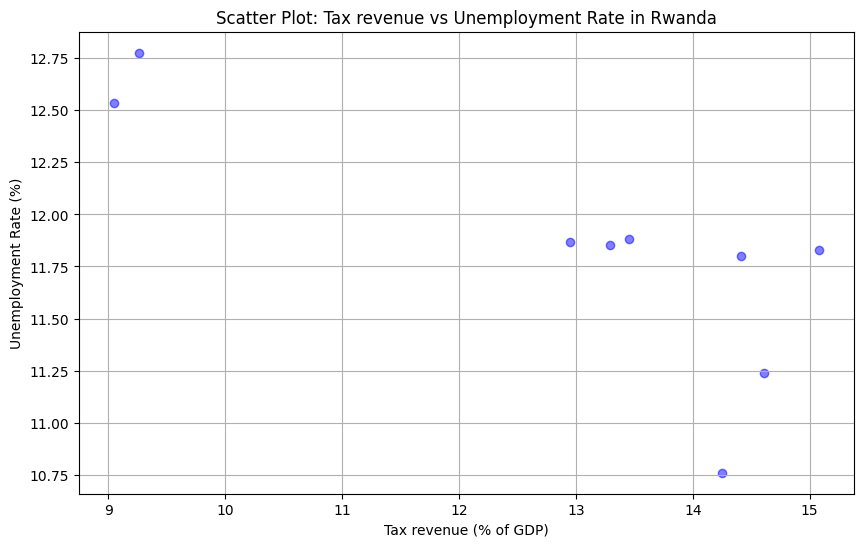

In [26]:
# Calculate the correlation coefficient
correlation_coefficient = df_merged['Tax revenue (% of GDP)'].corr(df_merged['Unemployment Rate (%)'])
print("Correlation coefficient between Tax revenue (% of GDP) and Unemployment Rate (%):", correlation_coefficient)

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Tax revenue (% of GDP)'], df_merged['Unemployment Rate (%)'], color='b', alpha=0.5)
plt.title('Scatter Plot: Tax revenue vs Unemployment Rate in Rwanda')
plt.xlabel('Tax revenue (% of GDP)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

**Insights:**

The correlation coefficient of -0.7991521669777149 indicates a strong negative relationship between Tax revenue (% of GDP) and Unemployment Rate (%) in Rwanda. This means as the tax revenue as a percentage of GDP increases, the unemployment rate tends to decrease, and vice versa.

This could suggest that as Rwanda’s economy grows (and thus collects more tax revenue), it may be creating more jobs and reducing unemployment. However, correlation does not imply causation. While these variables are related, we can’t say for sure that the increase in tax revenue is causing the decrease in unemployment. There could be other factors at play.

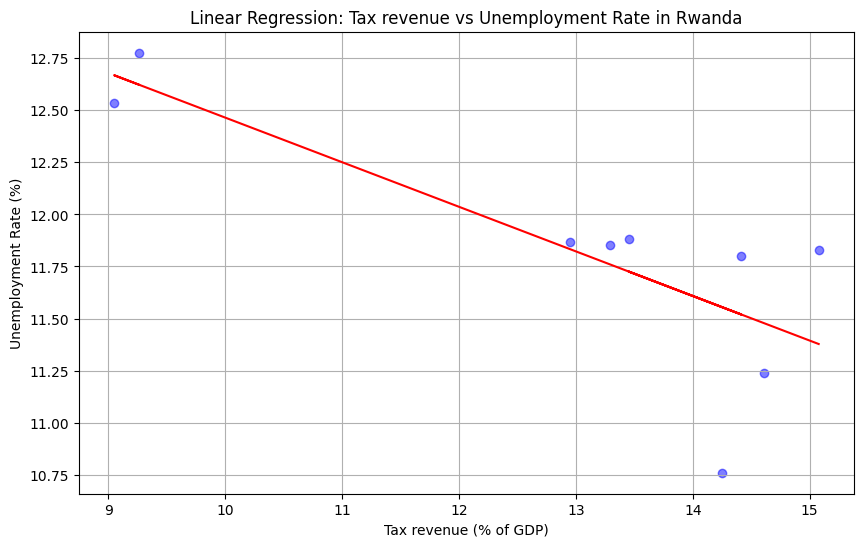

Coefficient: -0.21397860962016982


In [27]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression

X = df_merged[['Tax revenue (% of GDP)']]
y = df_merged['Unemployment Rate (%)']

model = LinearRegression()
model.fit(X, y)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', alpha=0.5)
plt.plot(X, model.predict(X), color='r')
plt.title('Linear Regression: Tax revenue vs Unemployment Rate in Rwanda')
plt.xlabel('Tax revenue (% of GDP)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

# Print the coefficients
# print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


**Insights:**

The coefficient  -0.21397860962016982  refers to the slope of the linear regression line from the above graph. The graph  depicts the relationship between tax revenue (as a percentage of GDP) and the unemployment rate in Rwanda. Since the slope is negative, it indicates a negative correlation between the two variables. In other words, as the unemployment rate increases, tax revenue tends to decrease (and vice versa). This could be due to several factors as explained in the previous insights keeping in mind that the correlation doesn't imply causation.
